In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
import plotly.graph_objects as go

In [21]:
url = 'https://raw.githubusercontent.com/okHotel/ssd_project/master/data_set/daily-min-temperatures.csv'
df = pd.read_csv(url, names=['Date', 'Temp'], skiprows=2556) #carico solo i dati degli ultimi 3 anni
df = df.sort_values(by=['Date']) #ordino i record in base alla data
df.insert(0, 'id', range(0,len(df)))

#df.head()
#fig = px.line(df, x = 'Date', y = 'Temp', title='Mininum temperature trend of Melbourne')
#fig.show()

SVR prevision

In [22]:
# Spilt dataset into train and test
X = df[['id']].values.reshape(-1,1)
Y = df[['Temp']].values.reshape(-1,1).ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
regressor = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=.01) # regressor definition
regressor.fit(X_train,Y_train) # regressor training
y_pred = regressor.predict(X_test) # regressor prediction

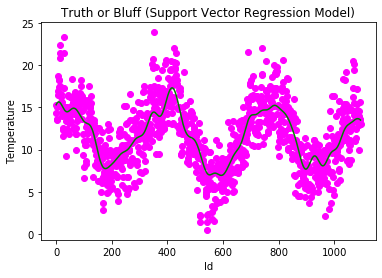

In [24]:
plt.scatter(X, Y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Id')
plt.ylabel('Temperature')
plt.show()

In [25]:
#df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
#df

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_pred.flatten(),
                    mode='markers',
                    name='predicted data'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=Y_test.flatten(),
                    mode='markers',
                    name='test data'))
fig.show()

In [26]:
# Evaluation
# 1 - ( Var(y' - y)/Var(y) )
explained_variance_score(Y_test, y_pred)

0.5877834504023535